In [1]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\mzig2\anaconda3\lib\site-packages (0.23.2)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ipynb

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install import_ipynb

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [5]:
class LIF_Neuron:
    def LIF(I, Cm, Rm):
        """
        Runs a LIF simulation on neuron and returns outputted voltage

                Parameters:
                        I (double[]): A list of input voltages in mV
                        Cm (double): The membrane capacitance
                        Rm (double): The membrane resistance

                Returns:
                        V (double[]): A list of the output voltages in mV
        """
        V_thresh = 30
        V_rest = -65
        V_spike = 80
        dT = 0.02  # time step in ms
        total_time = (I.size) * dT

        # an array of time
        time = np.arange(0, total_time, dT)

        # default voltage list set to resting volatage of -65mV
        V = (-65) * np.ones(len(time))
        #V_bin = 0*np.ones(len(time))

        did_spike = False

        # function member variable to track spikes
        LIF.spikes = 0.0

        for t in range(len(time)):
            # using "I - V(t)/Rm = Cm * dV/dT"
            dV = (I[t] - (V[t - 1] - V_rest) / Rm) / Cm

            # reset membrane potential if neuron spiked last tick
            if did_spike:
                V[t] = V_rest + dV * dT
            else:
                V[t] = V[t - 1] + dV * dT

            # check if membrane voltage exceeded threshold (spike)
            if V[t] > V_thresh:
                did_spike = True
                #V_bin[t] = 80
                # set the last step to spike value
                V[t] = V_spike
                LIF.spikes += 1
            else:
                did_spike = False

        return V, LIF.spikes
    
    def generateSpikeRates(input):
    
        """
        Encodes input into resulting spike rates for all timesteps in a time frame given input current injected 
        Parameters:
            input: Array of inputs at timesteps t
        Returns:
            spike_rate: Array of spiking rates at timesteps t
        """
        t = 100
        dT = .01
        time = np.arange(0, t + dT, dT)

        spike_rate = np.empty(input.size).astype(float)
        for i in range(input.size):
            """calculate spike rate for each iteration"""

            I = np.zeros(len(time))
            I[0:len(time)] = input[i]

            # run LIF simulation
            temp, spikes = LIF(I=I, Cm=4, Rm=5)

            # calculate the spike rate during the period
            spike_rate[i] = spikes / (time[len(time)-1] - time[0] ) * 100

        return spike_rate

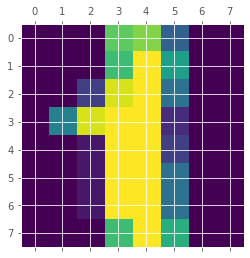

In [6]:
from sklearn.datasets import load_digits
 
digits = load_digits()
import matplotlib.pyplot as plt 
plt.matshow(digits.images[1]) 
plt.show()

In [7]:
#flattening to 1D arrays
#partitioning to training set, testing set, validation set
from sklearn.model_selection import train_test_split
X_train, X_other, y_train, y_other = train_test_split(digits.data, digits.images, test_size=0.2, shuffle=False)
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.5, shuffle=False)
print("Numbers to train: " + str(len(X_train)))
print("Number of train's target: " + str(len(y_train)))
print("Numbers to test: " + str(len(X_test)))
print("Number of test's target: " + str(len(y_test)))
print("Numbers to validate: " + str(len(X_val)))
print("Number of validate's target: " + str(len(y_val)))

X_val[0]

Numbers to train: 1437
Number of train's target: 1437
Numbers to test: 180
Number of test's target: 180
Numbers to validate: 180
Number of validate's target: 180


array([ 0.,  0.,  5., 16., 16.,  3.,  0.,  0.,  0.,  0.,  9., 16.,  7.,
        0.,  0.,  0.,  0.,  0., 12., 15.,  2.,  0.,  0.,  0.,  0.,  1.,
       15., 16., 15.,  4.,  0.,  0.,  0.,  0.,  9., 13., 16.,  9.,  0.,
        0.,  0.,  0.,  0.,  0., 14., 12.,  0.,  0.,  0.,  0.,  5., 12.,
       16.,  8.,  0.,  0.,  0.,  0.,  3., 15., 15.,  1.,  0.,  0.])

In [8]:
def poissonEncoding(rates):
    """
    Transforms a 2D array of inputs representing an image into spike train representation utilizing Poisson method of
    encoding
    
    Params:
        rates: 2D array of inputs (in this case, pixel intensitiies corresponding to our image)
    Returns:
        n_rates: Normalized set of input pixel values (represents probabilities of a spike occurring at each dT)
        bin_spikes: 2D array of binary values representing timesteps in which spikes occur
        p_spikes: 2D array representing pixel intensities of spike train representation for plotting/computation purposes
        
    """
    dT = 1
    
    max = np.amax(rates)
    n_rates = (rates*dT)/max
    
    rand = np.random.uniform(0,1, len(rates))
    #print(rand)
    #print(n_rates)
    bin_spikes = np.zeros(len(rates))
    pix_spikes = np.zeros(len(rates))
    
    for i in range(len(rates)):
        if n_rates[i] > rand[i]:
            bin_spikes[i] = 1
            pix_spikes[i] = max
                    
    return n_rates, bin_spikes, pix_spikes
    

In [9]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

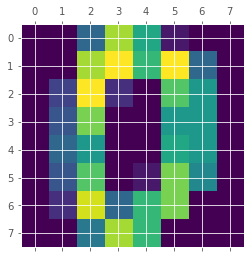

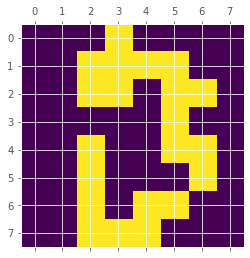

1797

In [10]:
plt.matshow(np.reshape(X_train[0], (8,8))) 
n, b, p = poissonEncoding(X_train[0])
X_train[0]
plt.matshow(p.reshape(8,8))
plt.show()

len(digits.images)

 ## GENERAL METHODOLOGY FOR DOING PT 2 I THINK
 
 -input = 8x8 image array
 
 -initialize weights as 64x10 array of zeros
 
  (weights[52][9] would be the connection between pixel 52 and neuron 9)
  
  (might also be a good idea to flatten input as 1D array for this reason)
  
 -establish a teacher set (for each # (output neuron), the pixels its most likely going to be correlated to (w_pix_# > 0))
 
  what I'll probably do is I'll run a Poisson encoding on 3 of the same image per number and just use the ones that are most  
  likely to get fired off
 
 -train the same way
 
  x_out is the binary spike (or the spike intensity who cares)
  
  y_out is the target intensity
  
  use the validation set as your teachers?
  
 -use test data to predict
 
 if max(output_neuron_rate) = digits.target[i]: prediction correct;
 else: incorrect

In [11]:
def train(X, Y, l_rt, init, epochs):
    
    weights = init
    
    for i in range(epochs):
        print("epoch: ", i)
        for x in range(len(X)):
            
            true_index = x % 10
            print("index: ", x, " true index: ", true_index)
            in_neurons = X[x]
            out_neurons = Y[x]
            
            in_n_rts, in_bins, in_pixs = poissonEncoding(in_neurons)
            
            print("input neurons: ", in_neurons)
            
            weight_adjs = np.zeros((len(in_neurons),10))
            
            y_out  = np.zeros((10,len(in_neurons)))
            y_out[true_index] = out_neurons.flatten()
                        
            for pix in range(len(in_neurons)):
                for digit in range(10):
                   weight_adjs[pix][digit] = l_rt*in_bins[pix]*y_out[digit][pix]
                
            weights = weights + weight_adjs
            print("new weights: ", weights)
    
    return weights.T

def predict(test, weights, targ):
    
    n, spikes, p = poissonEncoding(test)
    outs = np.zeros(len(weights))
    for i in range(len(weights)):
        outs[i] = np.dot(spikes, weights[i])
    
    prediction = np.argmax(outs)
    
    print("predicted value: ", prediction)
    
    if (prediction == targ):
        return True
    else:
        return False
    

    
    

In [12]:
init_weights = np.zeros((len(X_train[0]),10))


weights = train(X_train[0:20], y_train[0:20], 0.001, init_weights, 1)

epoch:  0
index:  0  true index:  0
input neurons:  [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
new weights:  [[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.005 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.013 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.009 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.013 0.    0.    0.    0.    0.    0.   

In [13]:
#w_i,j = w_pix, out
weights

array([[0.   , 0.   , 0.006, 0.022, 0.024, 0.011, 0.   , 0.   , 0.   ,
        0.   , 0.024, 0.031, 0.018, 0.029, 0.   , 0.   , 0.   , 0.002,
        0.031, 0.01 , 0.   , 0.02 , 0.   , 0.   , 0.   , 0.   , 0.028,
        0.   , 0.   , 0.008, 0.008, 0.   , 0.   , 0.009, 0.024, 0.004,
        0.   , 0.008, 0.016, 0.   , 0.   , 0.   , 0.016, 0.   , 0.001,
        0.023, 0.   , 0.   , 0.   , 0.   , 0.026, 0.   , 0.01 , 0.022,
        0.   , 0.   , 0.   , 0.   , 0.006, 0.013, 0.013, 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.012, 0.027, 0.018, 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.011, 0.032, 0.016, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.029, 0.032, 0.012, 0.   , 0.   , 0.   , 0.   , 0.025,
        0.032, 0.032, 0.012, 0.   , 0.   , 0.   , 0.   , 0.012, 0.03 ,
        0.032, 0.012, 0.   , 0.   , 0.   , 0.   , 0.   , 0.016, 0.032,
        0.015, 0.   , 0.   , 0.   , 0.   , 0.   , 0.016, 0.032, 0.02 ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.029, 0.02

In [14]:
def sim(test, weights):
    correct = 0
    for i in range(len(test)):
        x = predict(test[i], weights, i % 10)
        print("prediction correct: ", x)
        print("--------------------------")
        if x:
            correct += 1
    return correct/len(test)
        

In [15]:
accuracy = sim(X_train[0:20], weights)
print("accuracy: ", accuracy)

predicted value:  0
prediction correct:  True
--------------------------
predicted value:  1
prediction correct:  True
--------------------------
predicted value:  1
prediction correct:  False
--------------------------
predicted value:  5
prediction correct:  False
--------------------------
predicted value:  4
prediction correct:  True
--------------------------
predicted value:  5
prediction correct:  True
--------------------------
predicted value:  6
prediction correct:  True
--------------------------
predicted value:  7
prediction correct:  True
--------------------------
predicted value:  8
prediction correct:  True
--------------------------
predicted value:  9
prediction correct:  True
--------------------------
predicted value:  0
prediction correct:  True
--------------------------
predicted value:  1
prediction correct:  True
--------------------------
predicted value:  5
prediction correct:  False
--------------------------
predicted value:  1
prediction correct:  False
-

### DOESN'T WORK WITH FULL SET BECAUSE TRAINING SET DOESN'T GO IN ORDER PAST INDEX 20
### FIX THIS TMRW